In [533]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as wb

# Magic
%matplotlib inline

In [534]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = ['AMZN', 'AAPL', 'TSLA', 'JNJ', 'KO', 'BABA', 'JD', 'V', 'DAL', 'O',
        'AGNC', 'ITOCY','GLD', 'BNDX']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [535]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1498 entries, 2014-09-19 to 2020-08-31
Data columns (total 14 columns):
AMZN     1498 non-null float64
AAPL     1498 non-null float64
TSLA     1498 non-null float64
JNJ      1498 non-null float64
KO       1498 non-null float64
BABA     1498 non-null float64
JD       1498 non-null float64
V        1498 non-null float64
DAL      1498 non-null float64
O        1498 non-null float64
AGNC     1498 non-null float64
ITOCY    1498 non-null float64
GLD      1498 non-null float64
BNDX     1498 non-null float64
dtypes: float64(14)
memory usage: 175.5 KB


In [536]:
historical_data.head()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,O,AGNC,ITOCY,GLD,BNDX
Date,,,,,,,,,,,,,,
2014-09-19,331.320007,22.932617,51.863998,91.684982,34.855675,93.889999,28.350000,51.773079,34.706215,32.421764,10.931362,20.850121,117.089996,45.510075
2014-09-22,324.500000,22.955326,50.006001,91.591599,34.996582,89.889999,26.969999,51.205662,34.086460,32.052299,10.829155,21.175398,116.849998,45.571388
2014-09-23,323.630005,23.314219,50.082001,91.235016,34.723049,87.169998,26.570000,50.865692,33.861919,31.644314,10.790224,21.167259,117.599998,45.580147
2014-09-24,328.209991,23.112061,50.428001,92.236839,35.038040,90.570000,27.180000,51.332565,33.825985,31.474981,10.751283,21.329899,117.050003,45.553894
2014-09-25,321.929993,22.230740,49.389999,90.929352,34.631866,88.919998,26.570000,50.446728,32.927792,31.521162,10.756149,20.825722,117.389999,45.667778


In [537]:
historical_data.tail()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,O,AGNC,ITOCY,GLD,BNDX
Date,,,,,,,,,,,,,,
2020-08-25,3346.489990,124.824997,404.667999,152.059998,47.910000,286.000000,78.970001,208.100006,30.100000,62.339211,14.049319,49.580002,181.220001,57.869999
2020-08-26,3441.850098,126.522499,430.634003,152.300003,48.160000,291.959991,80.379997,210.259995,29.950001,61.452492,13.930341,49.869999,183.360001,57.889999
2020-08-27,3400.000000,125.010002,447.750000,152.979996,48.230000,284.170013,79.300003,211.029999,30.820000,62.269466,13.970000,49.450001,181.240005,57.830002
2020-08-28,3401.800049,124.807503,442.679993,153.639999,49.830002,289.000000,79.959999,215.710007,31.990000,63.205997,14.140000,49.660000,184.389999,57.779999
2020-08-31,3450.959961,129.039993,498.320007,153.410004,49.529999,287.029999,78.639999,211.990005,30.850000,62.029999,14.110000,52.799999,184.830002,57.740002


In [538]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1498 entries, 2014-09-19 to 2020-08-31
Data columns (total 14 columns):
AMZN     1497 non-null float64
AAPL     1497 non-null float64
TSLA     1497 non-null float64
JNJ      1497 non-null float64
KO       1497 non-null float64
BABA     1497 non-null float64
JD       1497 non-null float64
V        1497 non-null float64
DAL      1497 non-null float64
O        1497 non-null float64
AGNC     1497 non-null float64
ITOCY    1497 non-null float64
GLD      1497 non-null float64
BNDX     1497 non-null float64
dtypes: float64(14)
memory usage: 175.5 KB


In [539]:
returns.head()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,O,AGNC,ITOCY,GLD,BNDX
Date,,,,,,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.020799,0.000990,-0.036482,-0.001019,0.004034,-0.043537,-0.049902,-0.011020,-0.018019,-0.011461,-0.009394,0.015480,-0.002052,0.001346
2014-09-23,-0.002685,0.015513,0.001519,-0.003901,-0.007847,-0.030726,-0.014942,-0.006661,-0.006609,-0.012810,-0.003601,-0.000384,0.006398,0.000192
2014-09-24,0.014053,-0.008709,0.006885,0.010921,0.009031,0.038263,0.022699,0.009137,-0.001062,-0.005365,-0.003615,0.007654,-0.004688,-0.000576
2014-09-25,-0.019320,-0.038879,-0.020799,-0.014277,-0.011660,-0.018386,-0.022699,-0.017407,-0.026912,0.001466,0.000453,-0.023921,0.002900,0.002497


In [540]:
returns.tail()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,O,AGNC,ITOCY,GLD,BNDX
Date,,,,,,,,,,,,,,
2020-08-25,0.011732,-0.008238,0.004528,-0.000592,-0.001252,0.035519,0.035969,0.008154,0.010017,0.002080,-0.005630,-0.001209,0.001215,-0.003450
2020-08-26,0.028097,0.013507,0.062192,0.001577,0.005205,0.020625,0.017697,0.010326,-0.004996,-0.014326,-0.008505,0.005832,0.011740,0.000346
2020-08-27,-0.012234,-0.012026,0.038976,0.004455,0.001452,-0.027044,-0.013527,0.003655,0.028634,0.013207,0.002843,-0.008458,-0.011629,-0.001037
2020-08-28,0.000529,-0.001621,-0.011388,0.004305,0.032636,0.016854,0.008288,0.021935,0.037260,0.014928,0.012095,0.004238,0.017231,-0.000865
2020-08-31,0.014348,0.033350,0.118395,-0.001498,-0.006039,-0.006840,-0.016646,-0.017396,-0.036287,-0.018781,-0.002124,0.061311,0.002383,-0.000692


In [541]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([30.21, 28.49, 52.64, 19.27, 19.  , 32.61, 41.37, 25.36, 40.89,
       29.89, 23.95, 24.39, 14.07,  3.18])

In [542]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AMZN,0.16,1.91,39.13,30.21
1,AAPL,0.12,1.80,28.85,28.49
2,TSLA,0.15,3.33,37.79,52.64
3,JNJ,0.03,1.22,8.60,19.27
4,KO,0.02,1.20,5.87,19.00
5,BABA,0.07,2.06,18.66,32.61
6,JD,0.07,2.62,17.04,41.37
7,V,0.09,1.60,23.54,25.36
8,DAL,-0.01,2.59,-1.97,40.89
9,O,0.04,1.89,10.83,29.89


In [543]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AMZN    2014-10-24
AAPL    2020-03-16
TSLA    2020-03-16
JNJ     2018-12-14
KO      2020-03-12
BABA    2015-01-29
JD      2020-03-16
V       2020-03-16
DAL     2020-03-18
O       2020-03-16
AGNC    2020-03-12
ITOCY   2020-03-12
GLD     2020-08-11
BNDX    2020-03-18
dtype: datetime64[ns]

In [544]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AMZN    2015-04-24
AAPL    2020-03-13
TSLA    2020-02-03
JNJ     2020-03-30
KO      2020-04-06
BABA    2017-06-08
JD      2019-08-13
V       2020-03-24
DAL     2020-03-24
O       2020-03-24
AGNC    2020-03-25
ITOCY   2020-03-24
GLD     2016-06-24
BNDX    2020-03-25
dtype: datetime64[ns]

In [545]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,O,AGNC,ITOCY,GLD,BNDX
AMZN,3.650109e-04,1.833744e-04,0.000231,7.654516e-05,0.000057,1.887809e-04,0.000224,0.000155,0.000109,0.000064,0.000051,7.590489e-05,-0.000006,4.622636e-07
AAPL,1.833744e-04,3.246569e-04,0.000225,9.573557e-05,0.000087,1.729281e-04,0.000211,0.000178,0.000176,0.000110,0.000078,7.836213e-05,-0.000007,3.557185e-07
TSLA,2.308868e-04,2.248503e-04,0.001109,7.658971e-05,0.000089,2.206703e-04,0.000295,0.000203,0.000227,0.000183,0.000112,1.182146e-04,0.000005,2.570158e-06
JNJ,7.654516e-05,9.573557e-05,0.000077,1.485692e-04,0.000076,6.854958e-05,0.000084,0.000100,0.000090,0.000072,0.000043,5.593527e-05,-0.000002,2.948414e-07
KO,5.656895e-05,8.669480e-05,0.000089,7.579511e-05,0.000144,5.518822e-05,0.000070,0.000099,0.000135,0.000111,0.000078,5.722713e-05,0.000004,3.230528e-06
BABA,1.887809e-04,1.729281e-04,0.000221,6.854958e-05,0.000055,4.253616e-04,0.000338,0.000156,0.000163,0.000072,0.000052,8.910917e-05,-0.000008,-3.817176e-07
JD,2.240923e-04,2.111174e-04,0.000295,8.447992e-05,0.000070,3.377848e-04,0.000685,0.000177,0.000169,0.000082,0.000061,1.077401e-04,-0.000007,-1.391006e-06
V,1.545484e-04,1.779282e-04,0.000203,1.001433e-04,0.000099,1.563815e-04,0.000177,0.000257,0.000199,0.000148,0.000086,9.294364e-05,-0.000007,1.627824e-06
DAL,1.094583e-04,1.761565e-04,0.000227,9.006276e-05,0.000135,1.627575e-04,0.000169,0.000199,0.000669,0.000205,0.000191,1.233087e-04,-0.000018,5.350576e-06
O,6.437722e-05,1.098269e-04,0.000183,7.249735e-05,0.000111,7.164106e-05,0.000082,0.000148,0.000205,0.000357,0.000142,6.375231e-05,0.000023,1.246245e-05


In [546]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,O,AGNC,ITOCY,GLD,BNDX
AMZN,0.091253,0.045844,0.057722,0.019136,0.014142,0.047195,0.056023,0.038637,0.027365,0.016094,0.012649,0.018976,-0.001574,0.000116
AAPL,0.045844,0.081164,0.056213,0.023934,0.021674,0.043232,0.052779,0.044482,0.044039,0.027457,0.019580,0.019591,-0.001648,0.000089
TSLA,0.057722,0.056213,0.277131,0.019147,0.022311,0.055168,0.073699,0.050780,0.056866,0.045647,0.027878,0.029554,0.001147,0.000643
JNJ,0.019136,0.023934,0.019147,0.037142,0.018949,0.017137,0.021120,0.025036,0.022516,0.018124,0.010672,0.013984,-0.000522,0.000074
KO,0.014142,0.021674,0.022311,0.018949,0.036099,0.013797,0.017406,0.024799,0.033664,0.027670,0.019619,0.014307,0.001027,0.000808
BABA,0.047195,0.043232,0.055168,0.017137,0.013797,0.106340,0.084446,0.039095,0.040689,0.017910,0.012903,0.022277,-0.002077,-0.000095
JD,0.056023,0.052779,0.073699,0.021120,0.017406,0.084446,0.171141,0.044220,0.042365,0.020560,0.015253,0.026935,-0.001719,-0.000348
V,0.038637,0.044482,0.050780,0.025036,0.024799,0.039095,0.044220,0.064290,0.049751,0.037111,0.021612,0.023236,-0.001786,0.000407
DAL,0.027365,0.044039,0.056866,0.022516,0.033664,0.040689,0.042365,0.049751,0.167219,0.051326,0.047734,0.030827,-0.004581,0.001338
O,0.016094,0.027457,0.045647,0.018124,0.027670,0.017910,0.020560,0.037111,0.051326,0.089312,0.035562,0.015938,0.005638,0.003116


In [547]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,O,AGNC,ITOCY,GLD,BNDX
AMZN,1.000000,0.532689,0.362973,0.328701,0.246402,0.479100,0.448298,0.504441,0.221525,0.178277,0.174854,0.257565,-0.037036,0.012040
AAPL,0.532689,1.000000,0.374808,0.435910,0.400406,0.465344,0.447821,0.615788,0.378019,0.322487,0.286993,0.281945,-0.041094,0.009824
TSLA,0.362973,0.374808,1.000000,0.188727,0.223066,0.321360,0.338409,0.380431,0.264159,0.290143,0.221130,0.230181,0.015479,0.038414
JNJ,0.328701,0.435910,0.188727,1.000000,0.517483,0.272685,0.264900,0.512338,0.285698,0.314683,0.231221,0.297503,-0.019254,0.012037
KO,0.246402,0.400406,0.223066,0.517483,1.000000,0.222683,0.221444,0.514775,0.433282,0.487316,0.431168,0.308739,0.038420,0.133782
BABA,0.479100,0.465344,0.321360,0.272685,0.222683,1.000000,0.625971,0.472830,0.305133,0.183780,0.165219,0.280100,-0.045258,-0.009210
JD,0.448298,0.447821,0.338409,0.264900,0.221444,0.625971,1.000000,0.421568,0.250428,0.166299,0.153957,0.266956,-0.029528,-0.026456
V,0.504441,0.615788,0.380431,0.512338,0.514775,0.472830,0.421568,1.000000,0.479831,0.489747,0.355917,0.375741,-0.050055,0.050514
DAL,0.221525,0.378019,0.264159,0.285698,0.433282,0.305133,0.250428,0.479831,1.000000,0.419994,0.487439,0.309094,-0.079612,0.102951
O,0.178277,0.322487,0.290143,0.314683,0.487316,0.183780,0.166299,0.489747,0.419994,1.000000,0.496890,0.218666,0.134061,0.328112


In [548]:
no_assets = len(tickers)

In [549]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0


In [550]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)
pflio_scenarios.to_csv("ret_vol_index.csv")

In [551]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.161458,0.157341
1,0.167835,0.194544
2,0.151902,0.160654
3,0.162703,0.170334
4,0.146198,0.146459


In [552]:
pflio_scenarios.tail()

,Return,Volatility
9995,0.153565,0.192401
9996,0.130196,0.148411
9997,0.188266,0.183943
9998,0.166996,0.162770
9999,0.169544,0.172017


In [553]:
for i in range(10000):
    if pflio_scenarios['Return'][i] >= 0.21 and pflio_scenarios['Volatility'][i] <= 0.18:
        print(pflio_scenarios.iloc[i])

In [554]:
index = 5077
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
pflio_wei2 = pflio_wei[index]

print(pflio_scenarios.iloc[index])
tickers_df = pd.DataFrame({'Symbol':tickers})

weights_df = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio = pd.concat([tickers_df, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Weights', ascending=False)
ideal_portfolio

Return        0.143958
Volatility    0.163626
Name: 5077, dtype: float64


,Symbol,Weights
9,O,0.114063
5,BABA,0.110037
13,BNDX,0.106366
2,TSLA,0.101100
3,JNJ,0.094290
12,GLD,0.091877
6,JD,0.082351
4,KO,0.074562
10,AGNC,0.070937
8,DAL,0.046135


In [555]:
# Calculate Weighted Returns 
weights = np.array([pflio_wei2])
weighted_returns = ( weights * returns)

In [556]:
#pflio_wei2

In [557]:
capital = 23000
price = []

print(pflio_scenarios.iloc[index])

for i in range(len(pflio_wei2)):
    price.append(round(capital*pflio_wei2[i],2))
price = np.array(price)
price_portfolio = pd.DataFrame({'Price':price})
ideal_portfolio = pd.concat([tickers_df, price_portfolio, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Price', ascending=False)
ideal_portfolio

Return        0.143958
Volatility    0.163626
Name: 5077, dtype: float64


,Symbol,Price,Weights
9,O,2623.44,0.114063
5,BABA,2530.86,0.110037
13,BNDX,2446.42,0.106366
2,TSLA,2325.29,0.101100
3,JNJ,2168.68,0.094290
12,GLD,2113.16,0.091877
6,JD,1894.07,0.082351
4,KO,1714.93,0.074562
10,AGNC,1631.54,0.070937
8,DAL,1061.11,0.046135


In [558]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (250 days)", portfolio_return.mean()*250)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*10, pflio_wei2)))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*250, pflio_wei2)))
print("Portfolio Volatility (250 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*756, pflio_wei2)))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(tickers_df)):
    if i==0:
        div_risk = pflio_var - pflio_wei2[0]**2*variances['Variance'][0]
    else:
        div_risk -= pflio_wei2[i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

print("")
# Non Diversifiable Risk
non_div_risk1 = 0
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)*100
print("Non-Diversifiable Risk:", non_div_risk1, "%")

#print("")
non_div_risk2 = 0
for i in range(len(tickers_df)):
    non_div_risk2 += pflio_wei2[i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.0057544804191342665
Portfolio Return (250 days) 0.14386201047835664
Portfolio Return (756 days) 0.4350387196865505

Portfolio Volatility (10 days) 0.03272512320276967
Portfolio Volatility (250 days) 0.16362561601384834
Portfolio Volatility (756 days) 0.28453925363808047

Diversifiable Risk: 28.000000000000004 %

Non-Diversifiable Risk: 0.8099999999999999 %

Non-Diversifiable Risk: 0.8099999999999999 %
Non-Diversifiable Risk: True


Text(0, 0.5, 'Expected Return')

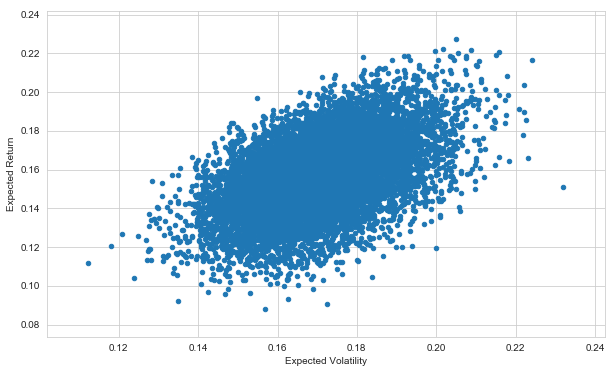

In [559]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

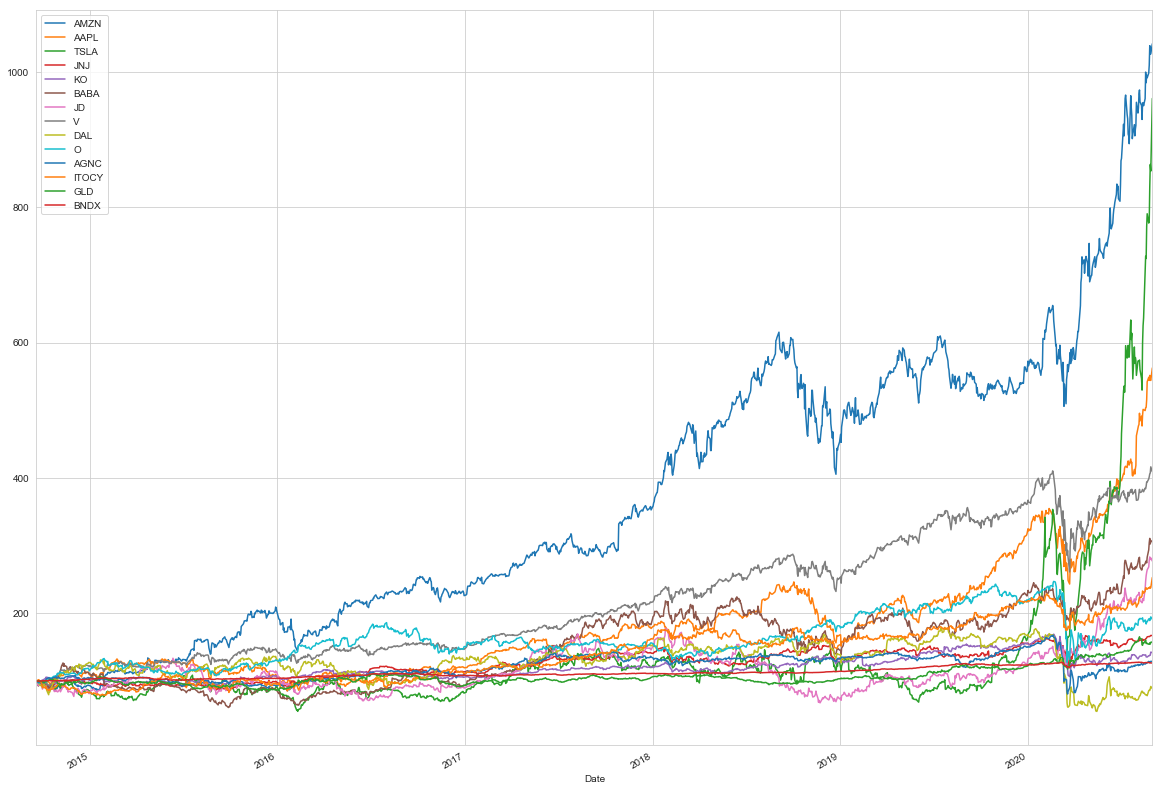

In [560]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

In [561]:
#sns.set_style('whitegrid')
#regression = sns.pairplot(returns[1:], kind="reg")
#regression

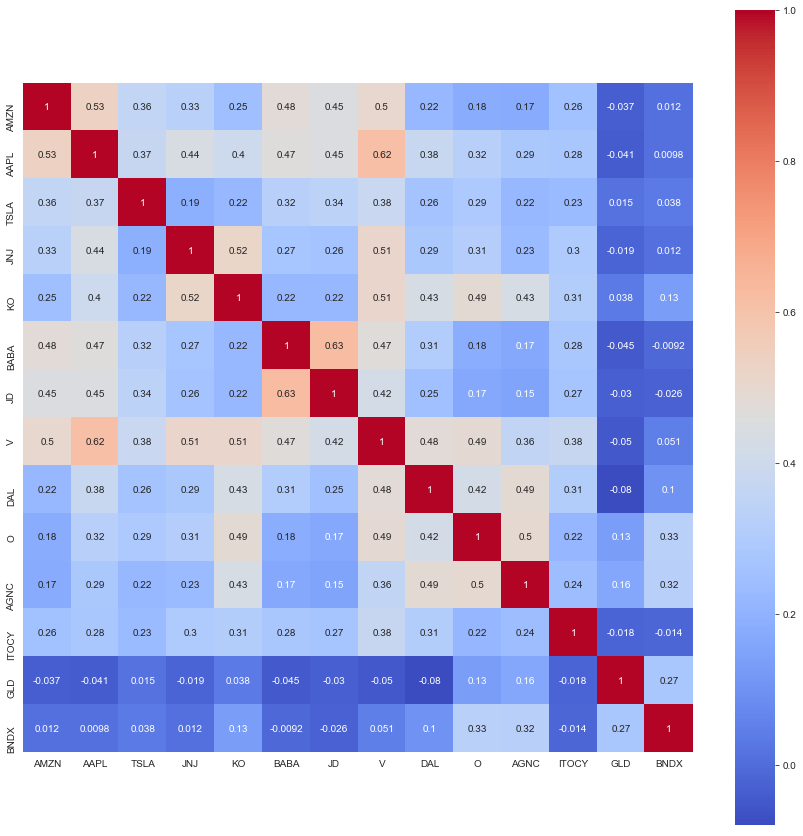

In [562]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap


## Notes

- Sell all JD after BABA earning calls (August 20)
- Sell 6% of BABA shares after earning calls (August 20)
- Re-run what happens after TSLA stock split 
- Re-run what happens after AAPL stock split
- Buy 8% JNJ shares